# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [6]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head() #chipo.head: 덜 깔끔한 형식

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64


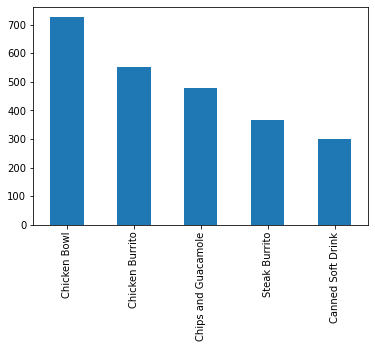

In [20]:
chipo.item_name.value_counts()[0:5].plot(kind='bar')
print(chipo.item_name.value_counts()[0:5])

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

item_price
$1.09     106
$1.25     264
$1.50     117
$1.69      99
$1.99       1
         ... 
$8.75     730
$8.90      40
$8.99     246
$9.25     398
$9.39      17
Name: quantity, Length: 78, dtype: int64


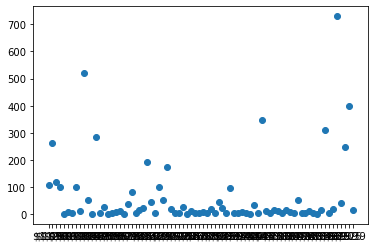

In [100]:
fig, ax = plt.subplots()
items_price = chipo.groupby('item_price')['quantity'].sum()
print(items_price)
plt.scatter(items_price.index.tolist(), items_price.tolist()) #.index 이용해 item_price를 list화해서 x축에 price 작성, y축은 item_name 기준으로 quantity를 합한 값

In [102]:
items_price.index.tolist()[:5]

['$1.09 ', '$1.25 ', '$1.50 ', '$1.69 ', '$1.99 ']

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [103]:
#가장 많은 매출액을 달성한 품목(주문수:quantity*판매가:item_price)
#item_name을 기준으로 item_price가 다 다르기 때문에 item_price 열을 숫자로 바꿔준 뒤 합해 계산해야 함.

#item_name별 주문 수
take1 = chipo.groupby('item_name')['quantity'].sum()
print(take1.head())

#item_name별 판매가-split으로 $ 없애주려고 했으나 실패함
items_price = chipo.groupby('item_name')['item_price'].sum()
print(items_price)

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64


TypeError: can't multiply sequence by non-int of type 'list'